In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# 데이터 로드
data = pd.read_csv('../data/complete.csv')

In [28]:
# Traffic rate 결측치 제거
data = data.dropna(subset=['Traffic rate'])

In [29]:
# Traffic rate를 사분위수로 범주화
data['Traffic_rate_cat'] = pd.qcut(data['Traffic rate'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# 분석에 사용할 특성 선택 및 스케일링
features = data[['Car registration', 'Import growth rate', 'Export growth rate']]  # 사용할 다른 특성 추가 가능
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [30]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['Traffic_rate_cat'], test_size=0.2, random_state=42)

# k-NN 모델 생성
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 모델 평가
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        High       0.49      0.59      0.54       153
         Low       0.68      0.57      0.62       179
      Medium       0.46      0.47      0.47       137
   Very High       0.73      0.71      0.72       179

    accuracy                           0.59       648
   macro avg       0.59      0.59      0.59       648
weighted avg       0.60      0.59      0.60       648



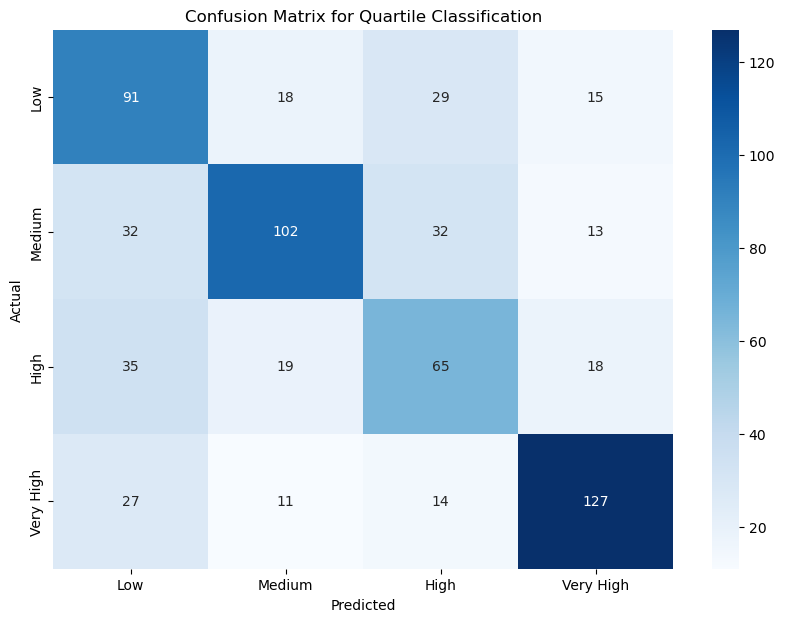

In [31]:
# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High', 'Very High'], yticklabels=['Low', 'Medium', 'High', 'Very High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Quartile Classification')
plt.show()

In [26]:
# Traffic rate를 삼분위로 범주화
data['Traffic_rate_tertile'] = pd.qcut(data['Traffic rate'], 3, labels=['Low', 'Medium', 'High'])

# 특성 선택 및 스케일링
features = data[['Car registration', 'Import growth rate', 'Export growth rate']]  # 사용할 다른 특성 추가 가능
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['Traffic_rate_tertile'], test_size=0.2, random_state=42)

# k-NN 모델 생성 및 훈련
knn_tertile = KNeighborsClassifier(n_neighbors=5)
knn_tertile.fit(X_train, y_train)

# 모델 평가
predictions_tertile = knn_tertile.predict(X_test)
print("Classification Report for Tertile:")
print(classification_report(y_test, predictions_tertile))

Classification Report for Tertile:
              precision    recall  f1-score   support

        High       0.70      0.83      0.76       235
         Low       0.65      0.56      0.60       225
      Medium       0.57      0.52      0.54       188

    accuracy                           0.65       648
   macro avg       0.64      0.64      0.63       648
weighted avg       0.64      0.65      0.64       648



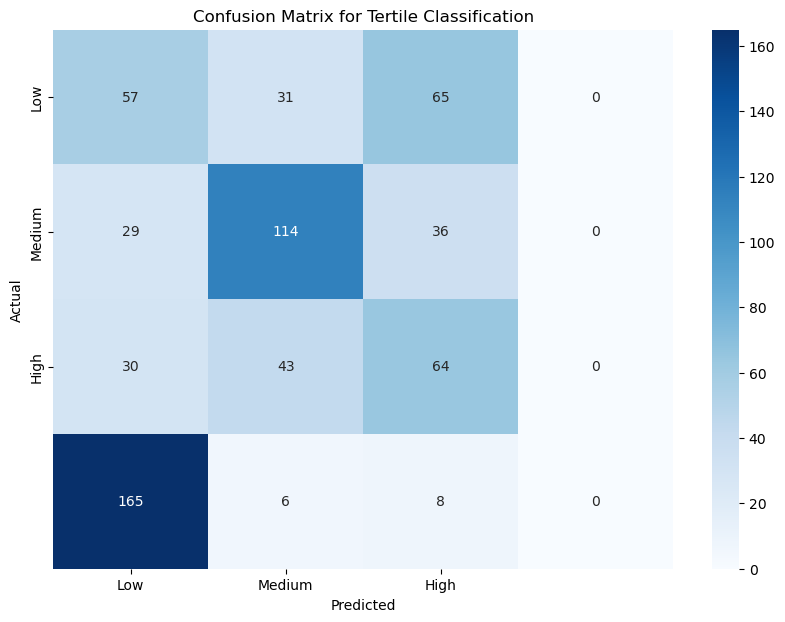

In [32]:
# 혼동 행렬 시각화
conf_matrix_tertile = confusion_matrix(y_test, predictions_tertile)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tertile, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tertile Classification')
plt.show()

In [27]:
# Traffic rate를 오분위로 범주화
data['Traffic_rate_quintile'] = pd.qcut(data['Traffic rate'], 5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# 데이터 분할
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(features_scaled, data['Traffic_rate_quintile'], test_size=0.2, random_state=42)

# k-NN 모델 생성 및 훈련
knn_quintile = KNeighborsClassifier(n_neighbors=5)
knn_quintile.fit(X_train_q, y_train_q)

# 모델 평가
predictions_quintile = knn_quintile.predict(X_test_q)
print("Classification Report for Quintile:")
print(classification_report(y_test_q, predictions_quintile))

Classification Report for Quintile:
              precision    recall  f1-score   support

        High       0.46      0.51      0.48       130
         Low       0.37      0.42      0.39       106
      Medium       0.43      0.40      0.41       117
   Very High       0.73      0.85      0.78       144
    Very Low       0.91      0.62      0.74       151

    accuracy                           0.58       648
   macro avg       0.58      0.56      0.56       648
weighted avg       0.60      0.58      0.58       648



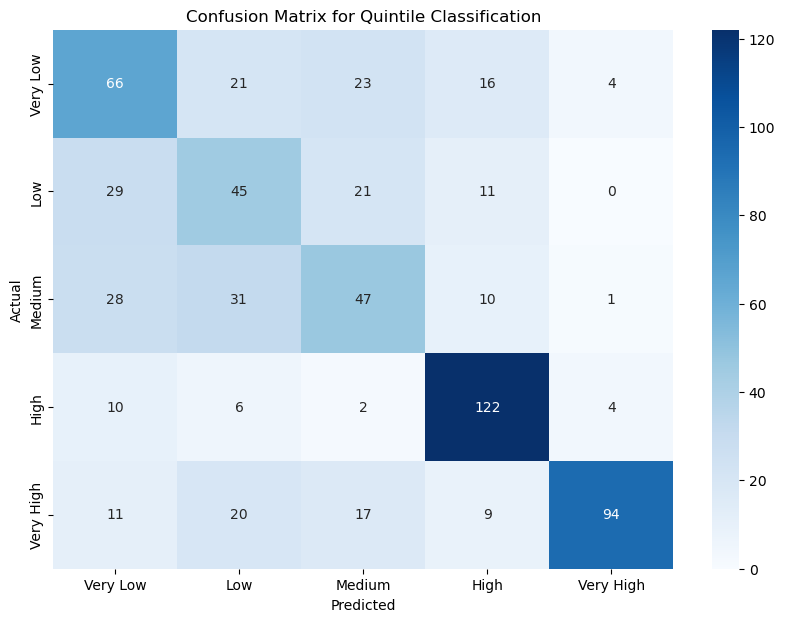

In [33]:
# 혼동 행렬 시각화
conf_matrix_quintile = confusion_matrix(y_test_q, predictions_quintile)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_quintile, annot=True, fmt='d', cmap='Blues', xticklabels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], yticklabels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Quintile Classification')
plt.show()